# Evolução de strings

**Problema**: Projetar um Algoritmo Genétrico que evolui uma população de strings até convergir para a seguinte string:

$METHINKS*IT*IS*LIKE*A*WEASEL$

Nesse caso, será assumido um espaço de busca composto pelo caractere de espaço (representado por *), letras maíusculas e digitos de 0 a 9.

A string alvo contém 28 caracteres e o espaço de busca é composto por 37 caracteres (26 letras, 10 números e o símbolo *). Portanto, o número de combinações possíveis é de $28^{37}$.

Uma string gerada aleatoriamente a partir dos caracteres disponíveis, teria uma probabilidade de $\frac{1}{28^{37}}$ de ser a resposta para o problema. 

Varrer todo o espaço de busca seria algo muito custoso computacionalmente e demoraria muito tempo. Uma boa forma de reduzir esse tempo é a partir da utilização de algoritmos mais inteligentes e que consigam ir identificando quais são as soluções que mais se aproximam da string objetivo.

Os algoritmos genéticos apresentam essa capacidade. Ao longo das tentativas de solução, eles conseguem ir filtrando as respostas que mais se aproximam da string desejada e assim caminham de forma mais rápida em direção à solução do problema. Isso é feito a partir de técnicas de cruzamento e mutação, que serão exploradas a seguir.

A solução para o problema de evolução de strings encontra-se nas células abaixo. Todo o código foi comentado para facilitar o entendimento e optou-se por realizar a implementação mais modulizarizada possível a fim de facilitar a execução de testes.

### Instalação dos requisitos

!pip install matplotlib

### Implementação da solução

In [142]:
import random
import time
import matplotlib.pyplot as plt

class StringAG:
    def __init__(self, goal, search_space, n_des, mut_rate) -> None:
        self.goal = goal
        self.search_space = search_space
        self.n_des = n_des
        self.mut_rate = mut_rate
        self.best_desc = [] #Lista de melhores descendentes
        self.allowed_pos = list(range(len(goal)))  #Lista de posicoes que podem mudar

        self.parent = []
        for i in range(len(self.goal)):
            self.parent.append(random.choice(self.search_space))
        print("Initial string: ", self.parent)
    
    
    def generate_plot(self, fitness, gens) -> None:
        plt.plot(list(range(gens)), fitness, '-', label = 'Fitness médio')
        plt.xlabel('Geração')
        plt.ylabel('Fitness')
        plt.legend(loc="upper left")
        plt.title('Evolução do fitness médio')

    def mutate(self,children_list) -> list:
        child = self.parent[:]
        # Iterando sobre as posicoes do child, para cada posicao, permitir a possibilidade de mutacao
        for pos in self.allowed_pos:
            #Deixar o residuo mutar com uma probabilidade de mut_rate
            if random.random() < self.mut_rate:

                #Selecionando um caractere aleatoriamente (diferente do caractere atual)
                prev_char = self.parent[pos]
                new_espaco = set(self.search_space) - set(prev_char)
                new_char = random.choice(list(new_espaco))

                # child com mutacao
                child[pos] = new_char
            children_list.append(child)

        return children_list

    def best_fit(self, children_list) -> float:
        #Encontrando os descendentes com maior fit -> mais proximos ao goal
        smallest_dif = len(self.goal) + 1
        for child in children_list:
            # Encontrando o numero de posicoes que se diferem entre o child e o goal
            dif = 0.0
            for pos in range(len(self.goal)):
                if child[pos] != self.goal[pos]:
                    dif += 1
            # Mantendo o melhor child encontrado ate o momento
            if dif < smallest_dif:
                smallest_dif = dif
                self.best_desc = child

        return smallest_dif

    def update_generation(self) -> list:

        #Gerar n_des childs que podem conter mutacoes
        children_list = []

        for i in range(self.n_des):

            children_list = self.mutate(children_list)

            # # Adicionando childs a lista
            # children_list.append(child)

            smallest_dif = self.best_fit(children_list)

            #Removendo as posicoes que ja estao corretas da lista de posicoes permitidas para a mutacao
            tmp_list = self.allowed_pos[:]
            for pos in tmp_list:
                if self.best_desc[pos] == self.goal[pos]:
                    self.allowed_pos.remove(pos)

            #Utilizando o melhor descendente como ponto de start para o proximo ciclo de mutacoes
            self.parent = self.best_desc

            fitness = (len(self.goal) - smallest_dif)/len(self.goal)
            result_string = ""
            for pos in range(len(self.goal)):
                if self.best_desc[pos] == self.goal[pos]:
                    result_string += self.best_desc[pos]
                else:
                    result_string += self.best_desc[pos].lower()

            return result_string, smallest_dif, fitness

    def start(self) -> int:
        gen = 0
        all_fitness = []
        while self.best_desc != self.goal:
            gen += 1
            result_string, smallest_dif, fitness = self.update_generation()
            all_fitness.append(fitness)
            print ("%s  ->  Geracao: %4d  -  Menor Dif: %3d  -  Fitness: %.4f "\
                        % (result_string, gen, smallest_dif, fitness), end='\r')
            time.sleep(0.0001)
        self.generate_plot(all_fitness, gen)
        return gen

### Testes

O primeiro teste baseou-se na seleção de um número fixo de descendentes e probabilidade de mutação para entender qual seria o número médio de gerações necessárias para a convergência. Optou-se por uma população inicial de 150 individuos e uma taxa de mutação de 0.5. 

In [136]:
all_gen = []

for i in range(100):
    algo = StringAG(
        goal  = list("METHINKS*IT*IS*LIKE*A*WEASEL"),
        search_space  = "ABCDEFGHIJKLMNOPQRSTUVWXYZ*0123456789",
        n_des  = 150,
        mut_rate = 0.5
    )

    num_ger = algo.start()
    print(num_ger)
    all_gen.append(num_ger)

Initial string:  ['3', 'W', 'Z', 'E', 'M', 'P', 'F', 'G', 'D', '*', 'D', 'C', 'T', 'I', 'C', 'S', 'A', 'A', 'C', 'A', 'C', 'A', 'X', 'H', 'U', '7', '*', 'A']
222HINKS*IT*IS*LIKE*A*WEASEL  ->  Geracao:  222  -  Menor Dif:   0  -  Fitness: 1.0000 
Initial string:  ['J', 'K', '4', 'V', 'F', 'G', '7', 'C', 'J', 'W', 'R', 'N', 'Y', 'I', '1', 'P', 'U', 'P', '6', 'I', '9', 'K', '4', 'B', 'R', 'O', 'W', 'V']
335HINKS*IT*IS*LIKE*A*WEASEL  ->  Geracao:  335  -  Menor Dif:   0  -  Fitness: 1.0000 
Initial string:  ['H', 'J', 'Z', 'U', 'H', '5', 'Q', 'W', '6', 'W', '1', 'B', 'F', '6', 'S', 'O', 'F', 'K', 'T', 'X', 'N', 'I', '5', 'Q', 'R', 'O', '*', '4']
235HINKS*IT*IS*LIKE*A*WEASEL  ->  Geracao:  235  -  Menor Dif:   0  -  Fitness: 1.0000 
Initial string:  ['X', 'M', '1', 'L', 'O', 'E', 'W', 'B', '4', 'Z', 'F', 'T', '1', 'F', 'K', 'E', 'W', '9', '7', '7', 'A', 'L', 'R', 'A', 'Y', 'F', '5', 'K']
158HINKS*IT*IS*LIKE*A*WEASEL  ->  Geracao:  158  -  Menor Dif:   0  -  Fitness: 1.0000 
Initial string: 

In [141]:
print("Número médio de gerações para a convergência: ", sum(all_gen)/100)

Número médio de gerações para a convergência:  268.92


O segundo teste buscou investigar o quanto a taxa de mutação influencia na solução do problema. Os testes realizados com os valores 0.1, 0.25, 0.5 e 0.75 encontram-se nas células a seguir.

Taxa de mutação: 0.1

Initial string:  ['W', 'X', 'K', 'R', '1', 'J', 'A', 'F', 'W', 'J', 'Q', '9', 'A', 'R', 'D', 'M', 'Q', 'T', '7', 'U', 'G', 'T', 'O', 'Y', 'P', 'Q', 'L', 'N']


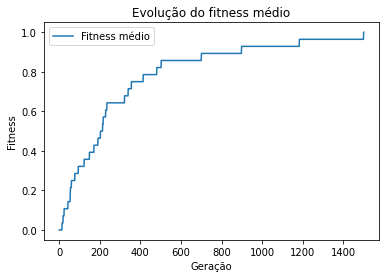

In [146]:
algo = StringAG(
        goal  = list("METHINKS*IT*IS*LIKE*A*WEASEL"),
        search_space  = "ABCDEFGHIJKLMNOPQRSTUVWXYZ*0123456789",
        n_des  = 150,
        mut_rate = 0.1
    )

num_ger = algo.start()

Taxa de mutação: 0.25

Initial string:  ['E', 'S', 'B', 'U', 'K', 'V', '1', 'U', 'R', 'T', 'P', '2', 'S', 'H', 'S', 'V', 'G', '7', 'T', '5', 'K', '4', '6', 'T', '*', 'K', 'T', '1']


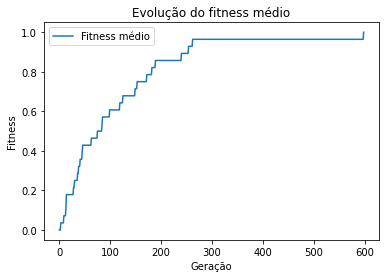

In [148]:
algo = StringAG(
        goal  = list("METHINKS*IT*IS*LIKE*A*WEASEL"),
        search_space  = "ABCDEFGHIJKLMNOPQRSTUVWXYZ*0123456789",
        n_des  = 150,
        mut_rate = 0.25
    )

num_ger = algo.start()

Taxa de mutação: 0.5

Initial string:  ['W', 'W', 'Z', 'X', 'E', 'R', 'U', 'V', 'P', 'J', 'R', 'K', 'P', 'L', 'I', '5', 'T', 'W', '5', '4', 'W', '*', 'V', 'C', 'A', '4', 'J', 'L']


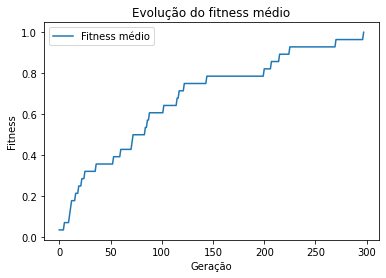

In [149]:
algo = StringAG(
        goal  = list("METHINKS*IT*IS*LIKE*A*WEASEL"),
        search_space  = "ABCDEFGHIJKLMNOPQRSTUVWXYZ*0123456789",
        n_des  = 150,
        mut_rate = 0.50
    )

num_ger = algo.start()

Taxa de mutação: 0.75

Initial string:  ['*', 'F', '8', 'N', 'X', '3', 'U', 'G', 'H', '6', 'M', 'T', 'E', 'R', '7', 'E', '4', 'V', '2', 'B', '5', 'U', 'M', 'H', 'U', 'U', 'U', 'B']


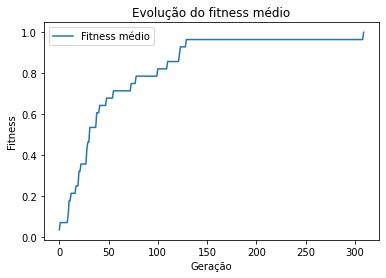

In [154]:
algo = StringAG(
        goal  = list("METHINKS*IT*IS*LIKE*A*WEASEL"),
        search_space  = "ABCDEFGHIJKLMNOPQRSTUVWXYZ*0123456789",
        n_des  = 150,
        mut_rate = 0.75
    )

num_ger = algo.start()

Foi possível notar que, ao aumentar a taxa de mutação até ~0.5 ocorreu uma diminuição no número de gerações necessárias para a convergência. No entanto, ao ultrapassar esse limiar, percebeu-se que a taxa de mutação começou a influenciar negativamente nas iterações necessárias para chegar em uma solução. Isso faz sentido pois uma maior taxa de mutação acaba produzindo indivíduos com muita variabilidade, podendo fazer com que a busca se desvie com maior frequência do caminho em direção à solução do problema.